# Reference file for quantification of extreme weather impacts

https://www.energy.gov/sites/prod/files/2019/09/f67/Oak%20Ridge%20National%20Laboratory%20EIS%20Response.pdf

Explore wildfires, extreme heat (max, median & min), sea-level rise, and flooding.
Infrastructure: generation, substations, transmission lines, & EV chargers.
Counties and population groups most affected?

Identify which infrastructure is impacted?
Graph lost capacity for generation plants; derated capacity for transmission lines
Evaluate accessibility after flooding using methodology in Puerto Rico paper https://www.researchgate.net/publication/362089738_Geospatial_Assessment_Methodology_to_Estimate_Power_Line_Restoration_Access_Vulnerabilities_After_a_Hurricane_in_Puerto_Rico


Importing FEMA flood plain data: 100 year, 200 year and 500 year

In [14]:
#Importing necessary libraries
import pandas as pd
import numpy as np
#import geopandas as gpd
#import geopandas as gpd
from arcgis.features import FeatureLayer
from arcgis.features import GeoAccessor


#Import the Path function
from pathlib import Path

In [67]:
#Reveal the current working directory
root_folder = Path.cwd().parent
data_folder = root_folder / 'Data'
scratch_folder = root_folder / 'Scratch'
scripts_folder = root_folder / 'Scripts'
print(root_folder)
print(scratch_folder)

v:\Maynard_Mutua
v:\Maynard_Mutua\Scratch


Note: there are several layers available for the 100 year, 200 year and 500 year flood plains. To add an extra data wrangling step, we import all the available layers and dissolve them in one layer for each category below.

### Importing and combining 100 year flood plain data

In [3]:
#Setting urls for the FEMA feature layers - to change to for loop later

#100 year flood layers
floodrisk_100_year_FEMA = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/5' #FEMA Effective
floodrisk_100_year_Regional = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/7' #Regional/Special Studies
floodrisk_100_year_DWR = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/8' #DWR Awareness
floodrisk_100_year_USACE = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/9' #USACE Comprehensive Study

#200 year flood layer
floodrisk_200_year_USACE = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/11'

#500 year flood layers
floodrisk_500_year_FEMA = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/13' #FEMA Effective
floodrisk_500_year_Regional = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/15' #Regional/Special Studies
floodrisk_500_year_USACE = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/16' #USACE Comprehensive Study




In [4]:
#Read the data in as feature layers
floodrisk_100yearlayer1 = FeatureLayer(floodrisk_100_year_FEMA)
floodrisk_100yearlayer2 = FeatureLayer(floodrisk_100_year_Regional)
floodrisk_100yearlayer3 = FeatureLayer(floodrisk_100_year_DWR)
floodrisk_100yearlayer4 = FeatureLayer(floodrisk_100_year_USACE)

In [5]:
hundredYearFeatureLayers = [floodrisk_100yearlayer1, floodrisk_100yearlayer2, floodrisk_100yearlayer3, floodrisk_100yearlayer4]

for layer in hundredYearFeatureLayers:
    for f in layer.properties.fields:
        print(f['name'])
    print('---------------')

OBJECTID
Shape
DFIRM_ID
VERSION_ID
FLD_AR_ID
STUDY_TYP
FLD_ZONE
ZONE_SUBTY
SFHA_TF
STATIC_BFE
V_DATUM
DEPTH
LEN_UNIT
VELOCITY
VEL_UNIT
AR_REVERT
AR_SUBTRV
BFE_REVERT
DEP_REVERT
DUAL_ZONE
SOURCE_CIT
GFID
Shape_Length
Shape_Area
CO_FIPS
County
---------------
OBJECTID
Shape
FLOODPLAIN
DESCRIPTON
ZONE
AREA
PERIMETER
REGULATION
SourceName
Area_ac
Watercours
DocName
DESCRPTON
CLASS
Entity
Handle
Level
LvlDesc
LyrOn
LvlPlot
Color
Linetype
LyrLnType
Elevation
GGroup
Fill
LineWt
LyrLineWt
LTScale
DocPath
DocType
DocVer
MsLink_DMR
MsCtlg_DMR
Regualtion
Shape_Length
Shape_Area
---------------
OBJECTID
Shape
Source
Folder
Shape_Length
Shape_Area
---------------
OBJECTID_1
Shape
OBJECTID
LAYER
COUNT_
SUM_ACRES
AREA
PERIMETER
ACRES
Shape_Leng
Shape_Length
Shape_Area
---------------


In [7]:
#Import system modules
import arcpy

#Set workspace
arcpy.env.workspace = str(scratch_folder)
arcpy.env.overwriteOutput = True

#Add code to merge or dissolve layers into one
addSourceInfo = 'ADD_SOURCE_INFO'

# Create FieldMappings object to manage merge output fields
fieldMappings = arcpy.FieldMappings()

# Add all fields from both oldStreets and newStreets
fieldMappings.addTable(floodrisk_100_year_FEMA)
fieldMappings.addTable(floodrisk_100_year_Regional)
fieldMappings.addTable(floodrisk_100_year_DWR)
fieldMappings.addTable(floodrisk_100_year_USACE)

# Remove all output fields from the field mappings, except fields 
# 'Shape', 'Shape_Length', & 'Shape_Area'
for field in fieldMappings.fields:
    if field.name not in ['Shape', 'Shape_Length', 'Shape_Area']:
        fieldMappings.removeFieldMap(fieldMappings.findFieldMapIndex(field.name))

# Use Merge tool to move features into single dataset
combined100YearFlood = str(scratch_folder / 'combined100YearFlood') 
arcpy.management.Merge([floodrisk_100_year_FEMA, 
                        floodrisk_100_year_Regional, 
                        floodrisk_100_year_DWR,
                        floodrisk_100_year_USACE],combined100YearFlood, '', addSourceInfo)

# Display any messages, warnings or errors
print(arcpy.GetMessages())

Start Time: Monday, December 9, 2024 7:54:34 PM
Succeeded at Monday, December 9, 2024 7:58:41 PM (Elapsed Time: 4 minutes 6 seconds)


In [8]:
arcpy.ListFields(floodrisk_100_year_DWR)

[<Field object at 0x2c89d89e790[0x2c88dc22270]>,
 <Field object at 0x2c89d89e8d0[0x2c88dc20b70]>,
 <Field object at 0x2c89d89e810[0x2c88dc22590]>,
 <Field object at 0x2c88dc53e10[0x2c88dc225b0]>,
 <Field object at 0x2c88dc53cd0[0x2c88dc225d0]>,
 <Field object at 0x2c88dc508d0[0x2c88dc21610]>]

### Importing and combining 200 year flood plain data

In [9]:
#Repeat for 200 year flood plain data

arcpy.conversion.ExportFeatures(floodrisk_200_year_USACE, str(scratch_folder / 'floodrisk_200_year_USACE'))

<Result 'v:\\Maynard_Mutua\\Scratch\\floodrisk_200_year_USACE.shp'>

### Importing and combining 500 year flood plain data

In [10]:
#Repeat for 500 year flood plain data

floodrisk_500_year_FEMA = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/13' #FEMA Effective
floodrisk_500_year_Regional = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/15' #Regional/Special Studies
floodrisk_500_year_USACE = 'https://gis.water.ca.gov/arcgis/rest/services/Boundaries/BAM/MapServer/16' #USACE Comprehensive Study

floodrisk_500yearlayer1 = FeatureLayer(floodrisk_500_year_FEMA)
floodrisk_500yearlayer2 = FeatureLayer(floodrisk_500_year_Regional)
floodrisk_500yearlayer3 = FeatureLayer(floodrisk_500_year_USACE)

# Create FieldMappings object to manage merge output fields
fieldMappings = arcpy.FieldMappings()

# Add all fields from both oldStreets and newStreets
fieldMappings.addTable(floodrisk_500_year_FEMA)
fieldMappings.addTable(floodrisk_500_year_Regional)
fieldMappings.addTable(floodrisk_500_year_USACE)

# Remove all output fields from the field mappings, except fields 
# 'Shape', 'Shape_Length', & 'Shape_Area'
for field in fieldMappings.fields:
    if field.name not in ['Shape', 'Shape_Length', 'Shape_Area']:
        fieldMappings.removeFieldMap(fieldMappings.findFieldMapIndex(field.name))

# Use Merge tool to move features into single dataset
combined500YearFlood = str(scratch_folder / 'combined500YearFlood') 
arcpy.management.Merge([floodrisk_500_year_FEMA, 
                        floodrisk_500_year_Regional,
                        floodrisk_500_year_USACE],combined500YearFlood, '', addSourceInfo)

# Display any messages, warnings or errors
print(arcpy.GetMessages())

Start Time: Monday, December 9, 2024 7:59:37 PM
Succeeded at Monday, December 9, 2024 8:01:37 PM (Elapsed Time: 2 minutes 0 seconds)


### Convert to spatial dataframes and wrangle data

In [42]:
#Convert layers to spatial dataframes
sdf_floodrisk_100year = GeoAccessor.from_layer(floodrisk_100yearlayer1)
#sdf_floodrisk_200year = GeoAccessor.from_layer(floodrisk_200yearlayer)
#sdf_floodrisk_500year = GeoAccessor.from_layer(floodrisk_500yearlayer)

In [44]:
sdf_floodrisk_100year.columns

Index(['OBJECTID', 'DFIRM_ID', 'VERSION_ID', 'FLD_AR_ID', 'STUDY_TYP',
       'FLD_ZONE', 'ZONE_SUBTY', 'SFHA_TF', 'STATIC_BFE', 'V_DATUM', 'DEPTH',
       'LEN_UNIT', 'VELOCITY', 'VEL_UNIT', 'AR_REVERT', 'AR_SUBTRV',
       'BFE_REVERT', 'DEP_REVERT', 'DUAL_ZONE', 'SOURCE_CIT', 'GFID',
       'Shape_Length', 'Shape_Area', 'CO_FIPS', 'County', 'SHAPE'],
      dtype='object')

In [45]:
sdf_floodrisk_100year.head()

,OBJECTID,DFIRM_ID,VERSION_ID,FLD_AR_ID,STUDY_TYP,FLD_ZONE,ZONE_SUBTY,SFHA_TF,STATIC_BFE,V_DATUM,...,BFE_REVERT,DEP_REVERT,DUAL_ZONE,SOURCE_CIT,GFID,Shape_Length,Shape_Area,CO_FIPS,County,SHAPE
0,1,06087C,1.1.1.0,06087C_6,NP,A,<NA>,T,-9999.0,<NA>,...,-9999.0,-9999.0,<NA>,06087C_STUDY1,5c32f5e6-e407-499e-9aac-21070df175a9,2480.178083,40344.798174,087,Santa Cruz,"{""rings"": [[[-189089.44590000063, -93566.90960..."
1,2,06087C,1.1.1.0,06087C_12,NP,A,<NA>,T,-9999.0,<NA>,...,-9999.0,-9999.0,<NA>,06087C_STUDY1,5c32f5e6-e407-499e-9aac-21070df175a9,724.180157,24847.320406,087,Santa Cruz,"{""rings"": [[[-160979.05110000074, -115433.7480..."
2,3,06087C,1.1.1.0,06087C_14,NP,A,<NA>,T,-9999.0,<NA>,...,-9999.0,-9999.0,<NA>,06087C_STUDY1,5c32f5e6-e407-499e-9aac-21070df175a9,1407.449224,137581.273971,087,Santa Cruz,"{""rings"": [[[-143286.5594999995, -122125.10710..."
3,4,06087C,1.1.1.0,06087C_21,NP,A,<NA>,T,-9999.0,<NA>,...,-9999.0,-9999.0,<NA>,06087C_STUDY1,5c32f5e6-e407-499e-9aac-21070df175a9,15655.534418,902558.705077,087,Santa Cruz,"{""rings"": [[[-182445.5996000003, -96833.979199..."
4,5,06087C,1.1.1.0,06087C_62,NP,A,<NA>,T,-9999.0,<NA>,...,-9999.0,-9999.0,<NA>,06087C_STUDY1,5c32f5e6-e407-499e-9aac-21070df175a9,1057.795507,19269.758301,087,Santa Cruz,"{""rings"": [[[-177217.72959999926, -114214.1187..."


### Import county and roads shapefiles: could potentially enrich data to apply data engineering principles

In [6]:
#Code to import boundary and roads data
primary_roads_url = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/Transportation/MapServer/2'
primary_roads_layer = FeatureLayer(primary_roads_url)

secondary_roads_url = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/Transportation/MapServer/3'
secondary_roads_layer = FeatureLayer(secondary_roads_url)

local_roads_url = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/Transportation/MapServer/8'
local_roads_layer = FeatureLayer(local_roads_url)

In [34]:
server_url = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/Transportation/MapServer/'
tigerweb_map_service = gis.content.search(server_url)[0]
primary_roads_layer = tigerweb_map_service.layers[2] 
primary_roads_sdf = GeoAccessor.from_layer(primary_roads_layer)


In [35]:
secondary_roads_layer = tigerweb_map_service.layers[3] 
secondary_roads_sdf = GeoAccessor.from_layer(secondary_roads_layer)

In [ ]:
local_roads_layer = tigerweb_map_service.layers[8] 
local_roads_sdf = GeoAccessor.from_layer(local_roads_layer)

### Import electrical infrastructure data: transmission lines, substations, power plants and EV charging stations

In [18]:
#Code to import electrical infrastructure
transmission_url = 'https://services3.arcgis.com/bWPjFyq029ChCGur/arcgis/rest/services/Transmission_Line/FeatureServer/2'
transmission_layer = FeatureLayer(transmission_url)
transmission_sdf = GeoAccessor.from_layer(transmission_layer)

In [19]:
powerplants_url = 'https://services3.arcgis.com/bWPjFyq029ChCGur/arcgis/rest/services/Power_Plant/FeatureServer/0'
powerplants_layer = FeatureLayer(powerplants_url)
powerplants_sdf = GeoAccessor.from_layer(powerplants_layer)

In [18]:
#Code to import electrical infrastructure
transmission_url = 'https://services3.arcgis.com/bWPjFyq029ChCGur/arcgis/rest/services/Transmission_Line/FeatureServer/2'
transmission_layer = FeatureLayer(transmission_url)
transmission_sdf = GeoAccessor.from_layer(transmission_layer)

In [19]:
powerplants_url = 'https://services3.arcgis.com/bWPjFyq029ChCGur/arcgis/rest/services/Power_Plant/FeatureServer/0'
powerplants_layer = FeatureLayer(powerplants_url)
powerplants_sdf = GeoAccessor.from_layer(powerplants_layer)

In [20]:
solar_footprints_url = 'https://services3.arcgis.com/bWPjFyq029ChCGur/arcgis/rest/services/Solar_Footprints_V2/FeatureServer/0'
solar_footprints_layer = FeatureLayer(solar_footprints_url)
solar_footprints_sdf = GeoAccessor.from_layer(solar_footprints_layer)

### Import CalAdapt data by year - Allow user to specify and specific year and import the relevant shapefile in the time series

User inputs:

Flood data - 100 year / 200 year / 500 year
Sea level rise - flood scenario: max/med/min - Brian
Wildfire - get the raster file for a specific year based on user input of scenario and model (decide whether to fix model later) - Justin
Extreme heat - look into how to import and join - Brian


#### Wildfires

In [40]:
from osgeo import gdal
from matplotlib import pyplot as plt

In [6]:
#Code to import wildfire data

import requests
import geopandas as gpd
import pandas as pd
import numpy as np
r = requests.get('http://api.cal-adapt.org/api/')
r.json()

{'ccc4aregions': 'https://api.cal-adapt.org/api/ccc4aregions/',
 'cdistricts': 'https://api.cal-adapt.org/api/cdistricts/',
 'censustracts': 'https://api.cal-adapt.org/api/censustracts/',
 'climregions': 'https://api.cal-adapt.org/api/climregions/',
 'counties': 'https://api.cal-adapt.org/api/counties/',
 'datasets': 'https://api.cal-adapt.org/api/datasets/',
 'electricutilities': 'https://api.cal-adapt.org/api/electricutilities/',
 'evtlocations': 'https://api.cal-adapt.org/api/evtlocations/',
 'hadisdstations': 'https://api.cal-adapt.org/api/hadisdstations/',
 'hydrounits': 'https://api.cal-adapt.org/api/hydrounits/',
 'irwm': 'https://api.cal-adapt.org/api/irwm/',
 'locagrid': 'https://api.cal-adapt.org/api/locagrid/',
 'place': 'https://api.cal-adapt.org/api/place/',
 'rstores': 'https://api.cal-adapt.org/api/rstores/',
 'series': 'https://api.cal-adapt.org/api/series/',
 'states': 'https://api.cal-adapt.org/api/states/',
 'tseries': 'https://api.cal-adapt.org/api/tseries/',
 'wecc

In [2]:
series = requests.get('http://api.cal-adapt.org/api/series/')
#series.json()

In [ ]:
#{variable}_{period}_{model}_{scenario}

user_input_model = arcpy.GetParameterAsText(0)

if user_input_model == 'average simulation':
    slug_model = 'CanESM2'
elif user_input_model == 'warmer/drier simulation':
    slug_model = 'HadGEM2'
elif user_input_model == 'cooler/wetter simulation':
    slug_model = 'CNRM-CM5'
elif user_input_model == 'dissimilar simulation':
    slug_model = 'MIROC5'

user_input_scenario = arcpy.GetParameterAsText(1)

if user_input_scenario == 'medium emissions scenario':
    slug_scenario = 'rcp45'
elif user_input_scenario == 'high emissions scenario':
    slug_scenario = 'rcp85'


slug_var = 'fireprob' #fixed
slug_per = '10y' #fixed

slug_model = 'CNRM-CM5' #other options: 'CanESM2', 'HadGEM2', 'MIROC5'
#warmer/drier simulation: HadGEM2
#average simulation: CanESM2
#cooler/wetter simulation: CNRM-CM5
#dissimlar simulation (unlike other three to produce maximal coverage): MIROC5

slug_scenario = 'rcp45' #other options: 'rcp85'
#RCP 4.5: medium emissions scenario, GHG peak by 2040 and decline
#RCP 8.5: high emissions scenario, GHG continue to rise throughout the 21st century

slug_time = 'bau' #fixed, other options: 01 through 12, changes month, just 'bau' contains yearly data
slug = slug_var + '_' + slug_per + '_' + slug_model + '_' + slug_scenario + '_' + slug_time

params = {'slug': [slug], 'pagesize': 100}
#params = {'name': ['fire'], 'slug': 'prob', 'pagesize': 100}

#slug: {variable}_{period}_{model}_{scenario}

# Use params with the url.
response = requests.get('http://api.cal-adapt.org/api/series/', params=params)

# It is a good idea to check there were no problems with the request.
if response.ok:
    data = response.json()
    # Get a list of raster series from results property of data object
    results = data['results']
    # Iterate through the list and print the url property of each object
    for item in results:
        print(item['slug'])

fireprob_10y_CNRM-CM5_rcp45_bau
fireprob_10y_CNRM-CM5_rcp45_bau_01
fireprob_10y_CNRM-CM5_rcp45_bau_02
fireprob_10y_CNRM-CM5_rcp45_bau_03
fireprob_10y_CNRM-CM5_rcp45_bau_04
fireprob_10y_CNRM-CM5_rcp45_bau_05
fireprob_10y_CNRM-CM5_rcp45_bau_06
fireprob_10y_CNRM-CM5_rcp45_bau_07
fireprob_10y_CNRM-CM5_rcp45_bau_08
fireprob_10y_CNRM-CM5_rcp45_bau_09
fireprob_10y_CNRM-CM5_rcp45_bau_10
fireprob_10y_CNRM-CM5_rcp45_bau_11
fireprob_10y_CNRM-CM5_rcp45_bau_12


In [ ]:
json = response.json()
json


{'count': 13,
 'next': None,
 'previous': None,
 'results': [{'name': 'U.C. Merced Decadal Yearly Wildfire Probability business as usual scenario CNRM-CM5 RCP 4.5',
   'slug': 'fireprob_10y_CNRM-CM5_rcp45_bau',
   'url': 'https://api.cal-adapt.org/api/series/fireprob_10y_CNRM-CM5_rcp45_bau/',
   'begin': '1960-01-01T00:00:00Z',
   'end': '2099-12-31T00:00:00Z',
   'rasters': ['https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1960-1969/',
    'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1970-1979/',
    'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1980-1989/',
    'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1990-1999/',
    'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2000-2009/',
    'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2010-2019/',
    'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2020-2029/',
    'http

In [166]:
data_list = json['results'][0]['rasters'] #select bau, just yearly data
data_list

['https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1960-1969/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1970-1979/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1980-1989/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1990-1999/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2000-2009/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2010-2019/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2020-2029/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2030-2039/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2040-2049/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2050-2059/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2060-2069/',
 'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp

In [169]:
data_test = json['results'][0]['rasters'][11]
data_test

'https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2070-2079/'

In [170]:
response = requests.get(data_test)
test = pd.read_json(response.text, typ='series')
test['image']

'https://api.cal-adapt.org/media/img/30533/fireprob_10y_CNRM-CM5_rcp45.bau.2070-2079.tif'

In [181]:
#Reveal the current working directory
root_folder = Path.cwd().parent
data_folder = root_folder / 'Data'
scratch_folder = root_folder / 'Scratch'
scripts_folder = root_folder / 'Scripts'
print(root_folder)
print(scratch_folder)

v:\Maynard_Mutua
v:\Maynard_Mutua\Scratch


In [186]:
slug

'fireprob_10y_CNRM-CM5_rcp45_bau'

In [189]:
outFileName = (scratch_folder/f'{slug}.tif')
outFileName

WindowsPath('v:/Maynard_Mutua/Scratch/fireprob_10y_CNRM-CM5_rcp45_bau.tif')

In [ ]:
ds = gdal.Open(test['image'])
print(f'ds is a {type(ds)} object')
band = ds.GetRasterBand(1)
arr = band.ReadAsArray()

[cols, rows] = arr.shape

driver = gdal.GetDriverByName("GTiff")

outdata = driver.Create(outFileName, rows, cols, 1, gdal.GDT_Float32)
outdata.SetGeoTransform(ds.GetGeoTransform()) #set same geotransform as input
outdata.SetProjection(ds.GetProjection()) #set the same projection as input
outdata.GetRasterBand(1).WriteArray(arr)
outdata.FlushCache() #saves to disk

outdata = None
band=None
ds=None

#print(f'arr_1 is a {type(arr_1)} object')



ds is a <class 'osgeo.gdal.Dataset'> object


0

In [172]:
(np.nanmin(arr_1),
 np.nanmean(arr_1),
 np.nanmax(arr_1))  

(0.0, 0.15948512, 0.71574867)

In [174]:
value = np.nanquantile(arr_1, [ 0.95])

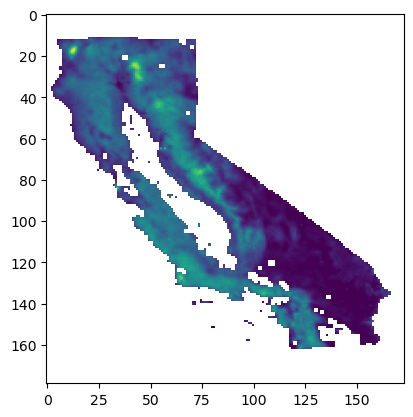

In [173]:
plt.imshow(arr_1);

In [120]:
for i in data_list:
    print(i)
    response = requests.get(i)
    image = pd.read_json(response.text, typ='series')
    print(image['image'])

https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1960-1969/
https://api.cal-adapt.org/media/img/30533/fireprob_10y_CNRM-CM5_rcp45.bau.1960-1969.tif
https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1970-1979/
https://api.cal-adapt.org/media/img/30533/fireprob_10y_CNRM-CM5_rcp45.bau.1970-1979.tif
https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1980-1989/
https://api.cal-adapt.org/media/img/30533/fireprob_10y_CNRM-CM5_rcp45.bau.1980-1989.tif
https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_1990-1999/
https://api.cal-adapt.org/media/img/30533/fireprob_10y_CNRM-CM5_rcp45.bau.1990-1999.tif
https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2000-2009/
https://api.cal-adapt.org/media/img/30533/fireprob_10y_CNRM-CM5_rcp45.bau.2000-2009.tif
https://api.cal-adapt.org/api/rstores/fireprob_10y_CNRM-CM5_rcp45_bau_2010-2019/
https://api.cal-adapt.org/media/img/30533/fireprob_10y_CNRM-CM5_rcp45.bau.

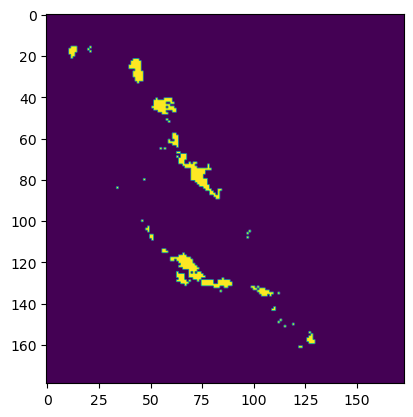

In [175]:
arr_mask = arr_1 > value
plt.imshow(arr_mask);

#### Sea level rise

In [ ]:
#Code to import sea level rise data

#### Extreme heat (if time allows)

### Find out which assets are affected by extreme weather events

We could find the intersection and create a dataframe with a column for derating and put these in a dashboard showing number of assets affected and severity.

### Find out which transmission lines and EV chargers might be inaccessible/offline following applicable extreme weather events

We could apply the same approach as the Puerto Rico paper and do a special analysis for EV chargers to show how distance to an working charger might be impacted across the different counties.

### Export shapefiles to be visualized in dashboard